In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: QtAgg


In [4]:
# importing datasets
datasets=pd.read_csv("Heart Attack.csv")
datasets.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
datasets.groupby('class').describe()

age                                                      gender  \
          count       mean        std   min   25%   50%   75%    max  count   
class                                                                         
negative  509.0  52.094303  13.730783  14.0  42.0  52.0  63.0   91.0  509.0   
positive  810.0  58.766667  12.955419  19.0  50.0  60.0  68.0  103.0  810.0   

                    ...    kcm         troponin                             \
              mean  ...    75%     max    count      mean       std    min   
class               ...                                                      
negative  0.603143  ...   3.35    7.02    509.0  0.026988  0.443320  0.001   
positive  0.695062  ...  12.25  300.00    810.0  0.570798  1.390704  0.003   

                                       
            25%    50%      75%   max  
class                                  
negative  0.003  0.006  0.00900  10.0  
positive  0.016  0.044  0.45625  10.3  

[2 rows x 64 columns]

In [6]:
# creating new columns on the datasets to create 
# datasets['positive']=datasets['class'].apply(lambda x:1 if x=='positive' else 0)

#  we also can do following to create dummies columns
#  this feature in pandas is called One Hot Encoding

In [7]:
dummies = pd.get_dummies(datasets['class'])
dummies

,negative,positive
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1314,1,0
1315,0,1
1316,0,1
1317,0,1


In [8]:
datasets=pd.concat([datasets,dummies],axis='columns')
datasets.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,negative,positive
0,64,1,66,160,83,160.0,1.80,0.012,negative,1,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,0,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,1,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,0,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,1,0


In [9]:
#   now drop the column class from datasets
datasets=datasets.drop('class',axis='columns')
datasets.head(5)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,negative,positive
0,64,1,66,160,83,160.0,1.80,0.012,1,0
1,21,1,94,98,46,296.0,6.75,1.060,0,1
2,55,1,64,160,77,270.0,1.99,0.003,1,0
3,64,1,70,120,55,270.0,13.87,0.122,0,1
4,55,1,64,112,65,300.0,1.08,0.003,1,0


In [10]:
target=datasets[['positive','negative']]
X=datasets.drop(['positive','negative'],axis='columns')
# this can also be done as 
# X = datasets.iloc[:, 1:2].values
# y = datasets.iloc[:, 2].values
#  not exact this but similar ways adjusting the value inside array



In [11]:
# we require only one output so drop negative
target=target.drop(['negative'],axis='columns')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.2)


In [13]:
X_train.head(2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
614,52,1,86,113,68,282.0,12.20,0.005
1150,53,1,60,113,52,100.0,2.68,0.015


In [14]:
y_train.head(2)

,positive
614,1
1150,1


In [15]:
#  we will require only one output  

In [16]:
#  Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [17]:
#  creating a model 
# random forest
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier()
modelRF.fit(X_train,y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_8588\103030784.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X_train,y_train)


RandomForestClassifier()

In [18]:
modelRF.score(X_test,y_test)

0.9886363636363636

In [19]:
# support vector classifier
from sklearn.svm import SVC
modelsvc=SVC()
modelsvc.fit(X_train,y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [20]:
modelsvc.score(X_test,y_test)

0.7765151515151515

In [21]:
modelsvc.predict([[34,0,50,164,81,135,2.35,0.004]])

array([1], dtype=uint8)

In [22]:
#  k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
modelknn=KNeighborsClassifier()
modelknn.fit(X_train,y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [23]:
modelknn.score(X_test,y_test)

0.6325757575757576

In [24]:
#  create confusion matrix for knn model
from sklearn.metrics import confusion_matrix
y_pred = modelknn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm


array([[ 54,  45],
       [ 52, 113]], dtype=int64)

Text(58.222222222222214, 0.5, 'truth')

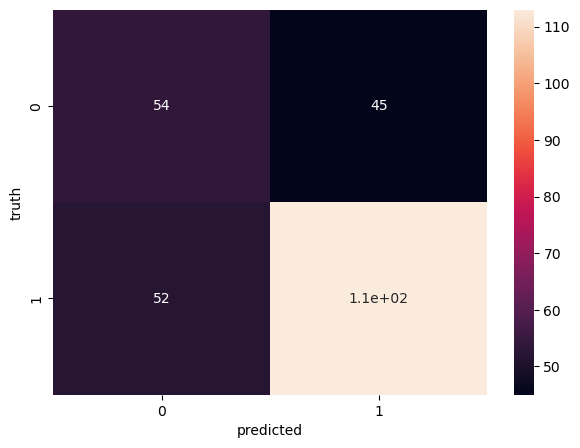

In [25]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [26]:
# naive bayes
#  gaussioan naive bayes
from sklearn.naive_bayes import GaussianNB
modelgnb=GaussianNB()
modelgnb.fit(X_train,y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [27]:
modelgnb.score(X_test,y_test)

0.6931818181818182

In [28]:
#  there is also multinomial naive bayes 
#  in naive bayes for natural language processing 


Adaboost classifier

In [29]:
#  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and 
# then fits additional copies of the classifier on the same dataset 
# but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.


In [30]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBC=AdaBoostClassifier()
model_AdaBC.fit(X_train,y_train)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [31]:
model_AdaBC.score(X_test,y_test)

0.9924242424242424

In [32]:
#  LGBM classifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [33]:
# gradient descent


In [34]:
# k _Fold cross validation
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [35]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)